# Cloud Computing

**What is cloud computing?**

Cloud computing is the on-demand delivery of IT resources over the Internet with pay-as-you-go pricing. Instead of buying, owning, and maintaining physical data centers and servers, you can access technology services, such as computing power, storage, and databases, on an as-needed basis from a cloud provider like Amazon Web Services (AWS).

Most popular cloud computing services:
- AWS: Amazon Web Services
- GCP: Google Cloud Platform
- Azure: Microsoft Cloud Services

# Setting up a VM

1. Open an account at GCP using my own gmail account
2. Go to "Compute Engine" ---> go to "VM instances" ---> creat a VM instance
3. VM machine configuration:
    - machine type: e2-micro (2vCPU, 1GB memory) (7 dollars/month)
    - Boot disk:
        - Operating system: Ubuntu
        - Ubuntu version: Ubuntu 20.04 LTS
        - size: 10GB
4. Create the VM: now we have the external IP for the VM

# Connecting to VM
VM is like an apartment you bought. First thing you do is to set a key for the apartment

1. Go to terminal ---> go to the root using "cd ~" command ---> use "pwd" command to check the surrent path
2. Check if you have .ssh folder (a hidden folder) in your computer using command "ls .ssh"
3. If no such folder, need to create this folder under root using command "mkdir .ssh"
4. Enter the ssh folder using command "cd .ssh/"
5. Now we can make a key in this folder using command "ssh-keygen"
6. Follow the screen, keep hitting return button to generate the key using default setting
7. Now we can check files generated in the folder using command "ls". We should see two files appeared in the folder
    - id_rsa (private key)
    - id_rsa.pub (public key)
8. We can check the content of id_rsa.pub file using command "cat id_rsa.pub". We should see a very long string of characters. Copy the whole string
9. Now go back to our GCP web page
10. Under "setting (left of the screen)" ---> Click "Metadata" ---> Click "SSH Keys" in the page ---> Click "Add SSH keys" ---> past the whole string from id_rsa.pub file. ---> save. Now we set up the lock for our aparment!
<div>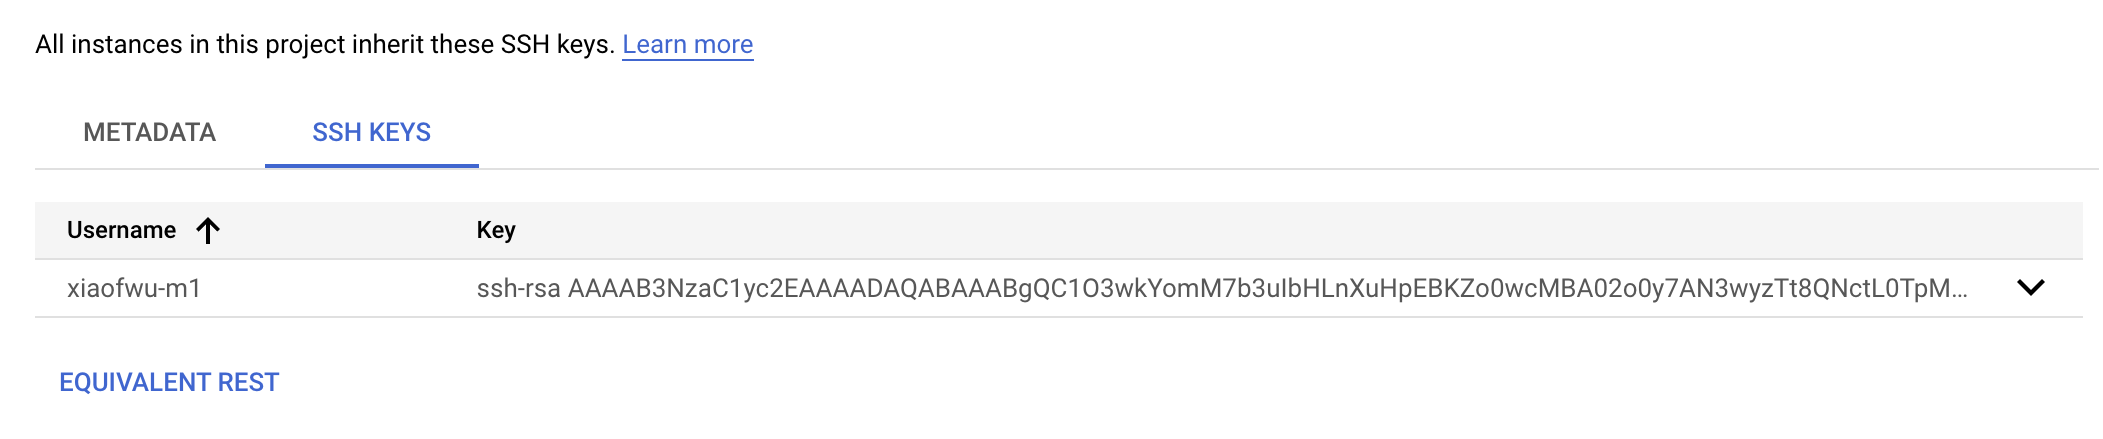</div> 

11. I can now access the VM machine using Username (xiaofwu-m1 as shown in the picture above), and IP address.
12. Let's get back to terminal ---> access the VM machine using the command "ssh xiaofwu-m1@34.123.113.14"
13. Now we are in our VM machine created at GCP

# Running Web App to VM

### <span style="color:magenta">To run an App or deploy a model in the VM machine, We need to do the following:
1. We need to upload our code onto the VM machine - git push
2. We need to install all required softwares in the VM. Remember, VM is like a computer. We need to install required software in order to run our codes in the VM machine.
3. We need to write a main.py file with streamlit code in the file for model deployment
4. use command "streamlit run main.py" to activate the web page

可以在VM里面建两个folder，1个是用来放从GitHub copy过来的 code (for example, folder DataScience in yaoyao's VM)。Another folder 用来放run streamlite 用的file (for example, laptop_price folder in yaoyao's VM)。 

Files need to create to run Streamlit for model deployment:
1. df.csv
2. model.pkl
3. requirement.txt
4. venv
5. main.py

### <span style="color:magenta">Git clone code files into VM. This should create a "churn" folder
    
1. Log into VM machine in terminal using command "ssh xiaofwu-m1@34.123.113.14".
2. git clone https://github.com/xiaofwu/Churn.git
3. Now we have git cloned our code into the VM machine

### <span style="color:magenta">Create a folder for model deployment (Streamlit files etc) and insatll venv, python and numpy (ver 1.23.5)
    
1. Log into VM machine in terminal using command "ssh xiaofwu-m1@34.123.113.14".
2. Make a new folder using command "mkdir SegandChurn"
3. Enter the empty folder using command "cd SegandChurn"
4. We need to install venv in this folder. If VM is created new, we need to install pip first using sudo (means you have the root permission)
5. Install pip using command "sudo apt update"
6. Install python using command "sudo apt install python3-pip"
7. Check python version using command "python3 --version"
8. Install venv in model deployment folder using command "sudo pip3 install virtualenv"
9. Set up python for the venv using command "virtualenv --python=python3 venv"
10. Activate the vene using command "source venv/bin/activate"
11. Install numpy "python -m pip install numpy==1.23.5"
12. Next, we need to create and run requirements.txt to install softwares required to run the model in the cloud.

### <span style="color:magenta">Content of requirements.txt file
1. use nano requirements.txt in terminal to create, write and save the file in model deployment folder
2. Enter model deployment folder using command "cd foldername"
3. Use nano to write the requirements.txt
4. Install softwares listed "pip install -r requirements.txt"
5. Note: you can copy file from one folder to another folder using command "cp model.pkl ../foldername/"
6. You can now deploy model using command "streamlit run main.py"
7. You can exit the VM using command "exit"

In [ ]:
scikit-learn==1.2.0
streamlit==1.16.0
threadpoolctl==3.1.0
Werkzeug==2.2.2
IPython==8.7.0
matplotlib==3.6.2
shap==0.41.0
xgboost==1.7.2

# Making Web App Available to 

# Remotely Copying Files

# Extra Knowledge Needed

## <span style="color:magenta">1. how to use Pickle to save a model?

**From GPT**

To save a model using Pickle, you will first need to import the Pickle module. You can then use the dump function to save the model to a file. Here is an example:

In [ ]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

The dump function takes two arguments: the object you want to save (in this case, the model), and the file object to which you want to save it. The file object must be opened in binary write mode ('wb').

To load the model from the file, you can use the load function:

In [ ]:
import pickle

# Load the model from the file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

The load function takes a file object, which must be opened in binary read mode ('rb').

It's important to note that Pickle is a Python-specific format, so the model you save using Pickle will only be usable in Python. If you need to use the model in a different language, you may need to use a different serialization format, such as ONNX or PMML.

## <span style="color:magenta">2. files from Yaoyao

In [ ]:
requirements.txt

scikit-learn==1.2.0
streamlit==1.16.0
threadpoolctl==3.1.0
Werkzeug==2.2.2
IPython==8.7.0
matplotlib==3.6.2
shap==0.41.0
xgboost==1.7.2

In [ ]:
Model deploy的步骤 (from yaoyao):

# save the csv file and model
X_all_data.to_csv("df.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))

# install/run virtualenv
virtualenv --python=python3 venv
source venv/bin/activate

# install libraries
python -m pip install numpy==1.23.5
pip install -r requirements.txt

# run streamlit
streamlit run main.py

参考code：
https://github.com/yyzhucheckpt/DataScience/tree/main/laptop_price

## <span style="color:magenta">2. Git related codes

In [ ]:
cd c:\techlent\seg
git clone
git clone https://github.com/lucyseven/Customer-segmentation-and-churn-prediction.git
cd Customer-segmentation-and-churn-prediction
git branch
git add.
git diff
git commit -m "step for adding file"
git push